<a href="https://colab.research.google.com/github/wujulie/ML__homework/blob/main/COVID_19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 讀入資料

In [ ]:
import numpy as np
import pandas as pd
data=pd.read_csv('/content/drive/MyDrive/COVID-19/covid_19_data.csv',header='infer')
pd.set_option('display.max_columns',None) 
print(data.shape)

(306429, 8)


In [ ]:
data.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306429 entries, 0 to 306428
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   SNo              306429 non-null  int64  
 1   ObservationDate  306429 non-null  object 
 2   Province/State   228329 non-null  object 
 3   Country/Region   306429 non-null  object 
 4   Last Update      306429 non-null  object 
 5   Confirmed        306429 non-null  float64
 6   Deaths           306429 non-null  float64
 7   Recovered        306429 non-null  float64
dtypes: float64(3), int64(1), object(4)
memory usage: 18.7+ MB


In [ ]:
data.isnull().sum()

SNo                    0
ObservationDate        0
Province/State     78100
Country/Region         0
Last Update            0
Confirmed              0
Deaths                 0
Recovered              0
dtype: int64

In [ ]:
import matplotlib.pyplot as plt
import seaborn

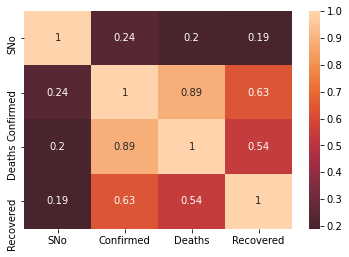

In [ ]:
df_corr = data.corr()
seaborn.heatmap(df_corr, center=0, annot=True)

plt.show()

# 增加 Date 欄位以利之後排序，
# 並刪掉 SNo，Last Update，ObservationDate 欄位


In [ ]:
def add_Date_column(original_data):
  temp = original_data
  temp.insert(0,'Date',pd.to_datetime(temp['ObservationDate'], format="%m/%d/%Y"))
  temp.drop(columns=['SNo','ObservationDate','Last Update'],inplace=True)
  return temp

In [ ]:
data1 = add_Date_column(data)
data1

,Date,Province/State,Country/Region,Confirmed,Deaths,Recovered
0,2020-01-22,Anhui,Mainland China,1.0,0.0,0.0
1,2020-01-22,Beijing,Mainland China,14.0,0.0,0.0
2,2020-01-22,Chongqing,Mainland China,6.0,0.0,0.0
3,2020-01-22,Fujian,Mainland China,1.0,0.0,0.0
4,2020-01-22,Gansu,Mainland China,0.0,0.0,0.0
...,...,...,...,...,...,...
306424,2021-05-29,Zaporizhia Oblast,Ukraine,102641.0,2335.0,95289.0
306425,2021-05-29,Zeeland,Netherlands,29147.0,245.0,0.0
306426,2021-05-29,Zhejiang,Mainland China,1364.0,1.0,1324.0
306427,2021-05-29,Zhytomyr Oblast,Ukraine,87550.0,1738.0,83790.0


# 清除負值

In [ ]:
def clean_negative(original_data):
  temp_data = original_data
  colum_name = ['Confirmed','Deaths','Recovered']
  for name in colum_name:
    filter=temp_data[name] < 0
    temp_data.drop(index=temp_data[filter].index,inplace=True)
  return temp_data


In [ ]:
data2 = clean_negative(data1)
data2

,Date,Province/State,Country/Region,Confirmed,Deaths,Recovered
0,2020-01-22,Anhui,Mainland China,1.0,0.0,0.0
1,2020-01-22,Beijing,Mainland China,14.0,0.0,0.0
2,2020-01-22,Chongqing,Mainland China,6.0,0.0,0.0
3,2020-01-22,Fujian,Mainland China,1.0,0.0,0.0
4,2020-01-22,Gansu,Mainland China,0.0,0.0,0.0
...,...,...,...,...,...,...
306424,2021-05-29,Zaporizhia Oblast,Ukraine,102641.0,2335.0,95289.0
306425,2021-05-29,Zeeland,Netherlands,29147.0,245.0,0.0
306426,2021-05-29,Zhejiang,Mainland China,1364.0,1.0,1324.0
306427,2021-05-29,Zhytomyr Oblast,Ukraine,87550.0,1738.0,83790.0


# 抓取指定國家的資料

In [ ]:
# original_data為原始資料 CountryRegion為你要抓取的國家名
def get_CountryRegion_data(original_data,CountryRegion):
  filter = original_data['Country/Region'] == CountryRegion
  return original_data[filter]

In [ ]:
us_data = get_CountryRegion_data(data2,"US")
us_data

,Date,Province/State,Country/Region,Confirmed,Deaths,Recovered
31,2020-01-22,Washington,US,1.0,0.0,0.0
71,2020-01-23,Washington,US,1.0,0.0,0.0
121,2020-01-24,Washington,US,1.0,0.0,0.0
122,2020-01-24,Chicago,US,1.0,0.0,0.0
164,2020-01-25,Washington,US,1.0,0.0,0.0
...,...,...,...,...,...,...
306395,2021-05-29,Virginia,US,675165.0,11160.0,0.0
306405,2021-05-29,Washington,US,435849.0,5765.0,0.0
306408,2021-05-29,West Virginia,US,161287.0,2792.0,0.0
306410,2021-05-29,Wisconsin,US,674003.0,7830.0,0.0


# 分別計算每天確診、死亡、康復人數總和

In [ ]:
def sort_by_date(data):
  return data.groupby(['Date'])['Confirmed','Deaths','Recovered'].sum()

In [ ]:
final = sort_by_date(us_data)
final

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


,Confirmed,Deaths,Recovered
Date,,,
2020-01-22,1.0,0.0,0.0
2020-01-23,1.0,0.0,0.0
2020-01-24,2.0,0.0,0.0
2020-01-25,2.0,0.0,0.0
2020-01-26,5.0,0.0,0.0
...,...,...,...
2021-05-25,33166418.0,590941.0,0.0
2021-05-26,33190470.0,591950.0,0.0
2021-05-27,33217995.0,593288.0,0.0


In [ ]:
#final.to_csv('/content/drive/MyDrive/COVID-19/US.csv')

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
Country = 'India'
us = pd.read_csv('/content/drive/MyDrive/COVID-19/India.csv')
us

,Date,Confirmed,Deaths,Recovered
0,2020-01-30,1.0,0.0,0.0
1,2020-01-31,1.0,0.0,0.0
2,2020-02-01,1.0,0.0,0.0
3,2020-02-02,2.0,0.0,0.0
4,2020-02-03,3.0,0.0,0.0
...,...,...,...,...
481,2021-05-25,27157795.0,311388.0,24350816.0
482,2021-05-26,27369093.0,315235.0,24633951.0
483,2021-05-27,27555457.0,318895.0,24893410.0
484,2021-05-28,27729247.0,322512.0,25178011.0


# 載入資料

In [ ]:
test = us
test

,Date,Confirmed,Deaths,Recovered
0,2020-01-30,1.0,0.0,0.0
1,2020-01-31,1.0,0.0,0.0
2,2020-02-01,1.0,0.0,0.0
3,2020-02-02,2.0,0.0,0.0
4,2020-02-03,3.0,0.0,0.0
...,...,...,...,...
481,2021-05-25,27157795.0,311388.0,24350816.0
482,2021-05-26,27369093.0,315235.0,24633951.0
483,2021-05-27,27555457.0,318895.0,24893410.0
484,2021-05-28,27729247.0,322512.0,25178011.0


# 正規化

In [ ]:
Deaths_max = np.array(test['Deaths']).max()
Deaths_min = np.array(test['Deaths']).min()
Confirmed_max = np.array(test['Confirmed']).max()
Confirmed_min = np.array(test['Confirmed']).min()

test['Deaths'] = (np.array(test['Deaths'])-Deaths_min)/(Deaths_max-Deaths_min)
test['Confirmed'] = (np.array(test['Confirmed'])-Confirmed_min)/(Confirmed_max-Confirmed_min)
test

,Date,Confirmed,Deaths,Recovered
0,2020-01-30,0.000000e+00,0.000000,0.0
1,2020-01-31,0.000000e+00,0.000000,0.0
2,2020-02-01,0.000000e+00,0.000000,0.0
3,2020-02-02,3.584898e-08,0.000000,0.0
4,2020-02-03,7.169795e-08,0.000000,0.0
...,...,...,...,...
481,2021-05-25,9.735791e-01,0.955260,24350816.0
482,2021-05-26,9.811539e-01,0.967062,24633951.0
483,2021-05-27,9.878349e-01,0.978290,24893410.0
484,2021-05-28,9.940651e-01,0.989386,25178011.0


In [ ]:
test_data = test.values
test_data.shape

(486, 4)

# 建立資料集

In [ ]:
import math
import torch
import torch.utils.data as Data
import numpy as np

In [ ]:
def toTensor(x):
  return torch.tensor(x)

In [ ]:
class MyDataset(Data.Dataset): #繼承
  def __init__(self,data,seq_length,train = True,transform=None):

    x_train = []
    y_train = []
    x_test = []
    y_test = []
    
    total_size = data.shape[0]
    train_size = math.ceil(data.shape[0]*0.7)


    for i in range(seq_length,train_size,7):
      x_train.append(data[i-seq_length:i,2])
      y_train.append(data[i-seq_length+1:i+1,2])

    

    for i in range(train_size,data.shape[0],7):
      x_test.append(data[i-seq_length:i,2])
      y_test.append(data[i-seq_length+1:i+1,2])
    
    data_size = np.array(x_train).shape[0]
    f = x_train
    l = y_train

    if train == False:
      f = x_test
      l = y_test
      data_size = np.array(x_test).shape[0]

      

    #print(np.array(f).shape) 
    #print(np.array(l)[10:20])
    #print(data_size)
    self.features = np.array(f).astype('float32').reshape(data_size,seq_length,1)
    self.labels = np.array(l).astype('float32').reshape(data_size,seq_length,1)
    self.transform = transform

  def __len__(self):
    return len(self.labels)

  def __getitem__(self,idx):
    if torch.is_tensor(idx):
      idx = idx.tolist()
      
    X = self.features[idx]
    Y = self.labels[idx]

    if self.transform:
      X = self.transform(X)
      Y = self.transform(Y)

    return X,Y

In [ ]:
train_dataset = MyDataset( data=test_data,
               seq_length=7,
               train=True,
               transform=toTensor)
test_dataset = MyDataset( data=test_data,
               seq_length=7,
               train=False,
               transform=toTensor)

In [ ]:
features,labels = train_dataset[:]
print(features.shape)
#print(features[0:10])
print(labels.shape)
#print(labels[0:10])

torch.Size([48, 7, 1])
torch.Size([48, 7, 1])


# DataLoader

In [ ]:
train_loader = Data.DataLoader(dataset=train_dataset,
                 batch_size=5,
                 shuffle=True)
test_loader = Data.DataLoader(dataset=test_dataset,
                 batch_size=5,
                 shuffle=False)

In [ ]:
for i,(seqs,labels) in enumerate(test_loader):
  print(seqs.shape)
  #print(labels)

torch.Size([5, 7, 1])
torch.Size([5, 7, 1])
torch.Size([5, 7, 1])
torch.Size([5, 7, 1])
torch.Size([1, 7, 1])


# 建預測模型

In [ ]:
input_size = 1
hidden_size = 64
num_layers = 2
num_class = 1

In [ ]:
import torch
import torch.nn as nn
from torch.autograd import Variable
from torchsummary import summary

In [ ]:
class LSTM_2_FC_3(nn.Module):
  def __init__(self,input_size,hidden_size,num_layers,num_class):
    super(LSTM_2_FC_3,self).__init__()#呼叫父類別建構子
    self.hidden_size = hidden_size
    self.num_layers = num_layers
    #self.normal = nn.BatchNorm1d(num_features=7,affine=True) #5是前面定的batch_size affine normal調整
    self.lstm = nn.LSTM( input_size = input_size,
                hidden_size = hidden_size,
                num_layers = num_layers,
                #bidirectional = True,
                batch_first = True)       #把第一個序列當batch

  
     
    self.fc = nn.Linear(hidden_size,hidden_size//2)
    self.fc1 = nn.Linear(hidden_size//2,hidden_size//4)
    self.fc2 = nn.Linear(hidden_size//4,num_class)
    
    #self.relu = nn.ReLU()
    #self.drop_out = nn.Dropout(0.1)  
  def forward(self,x):
    h0 = Variable(torch.zeros(num_layers,x.size(0),hidden_size))
    c0 = Variable(torch.zeros(num_layers,x.size(0),hidden_size))
    
    #out = self.normal(x)
    out,_ = self.lstm(x,(h0,c0))
    #out = self.drop_out(out)
    #out = self.relu(out)
    out = self.fc(out)
    out = self.fc1(out)
    out = self.fc2(out)
    
    
    return out

In [ ]:
LSTM_2_FC_3 = LSTM_2_FC_3(input_size,hidden_size,num_layers,num_class)
LSTM_2_FC_3

LSTM_2_FC_3(
  (lstm): LSTM(1, 64, num_layers=2, batch_first=True)
  (fc): Linear(in_features=64, out_features=32, bias=True)
  (fc1): Linear(in_features=32, out_features=16, bias=True)
  (fc2): Linear(in_features=16, out_features=1, bias=True)
)

# 模型訓練

In [ ]:
import torch.optim as opt

In [ ]:
loss_fn = nn.MSELoss()
mae = nn.L1Loss()
optimizer = opt.Adam(LSTM_2_FC_3.parameters(),lr=0.00005) #要優化的參數

In [ ]:
train_loss = []
for epoch in range(1500):
  for i,(seqs,labels) in enumerate(train_loader):
    seqs = Variable(seqs)
    labels = Variable(labels)
    optimizer.zero_grad()
    outputs = LSTM_2_FC_3(seqs)
    loss = loss_fn(outputs,labels.float()) #預測放前答案放後
    train_loss.append(loss.data)
    loss.backward()
    optimizer.step()

    if (epoch+1)%100 == 0:
      print('Epoch: %d, batch: %d, Loss: %4f'%(epoch+1,i+1,loss.data))

Epoch: 100, batch: 1, Loss: 0.011977
Epoch: 100, batch: 2, Loss: 0.008984
Epoch: 100, batch: 3, Loss: 0.023037
Epoch: 100, batch: 4, Loss: 0.018329
Epoch: 100, batch: 5, Loss: 0.009047
Epoch: 100, batch: 6, Loss: 0.005720
Epoch: 100, batch: 7, Loss: 0.014893
Epoch: 100, batch: 8, Loss: 0.005780
Epoch: 100, batch: 9, Loss: 0.017964
Epoch: 100, batch: 10, Loss: 0.015293
Epoch: 200, batch: 1, Loss: 0.006559
Epoch: 200, batch: 2, Loss: 0.007856
Epoch: 200, batch: 3, Loss: 0.003194
Epoch: 200, batch: 4, Loss: 0.008616
Epoch: 200, batch: 5, Loss: 0.005984
Epoch: 200, batch: 6, Loss: 0.008681
Epoch: 200, batch: 7, Loss: 0.006523
Epoch: 200, batch: 8, Loss: 0.003533
Epoch: 200, batch: 9, Loss: 0.004156
Epoch: 200, batch: 10, Loss: 0.004553
Epoch: 300, batch: 1, Loss: 0.002615
Epoch: 300, batch: 2, Loss: 0.001026
Epoch: 300, batch: 3, Loss: 0.002503
Epoch: 300, batch: 4, Loss: 0.002802
Epoch: 300, batch: 5, Loss: 0.002199
Epoch: 300, batch: 6, Loss: 0.002407
Epoch: 300, batch: 7, Loss: 0.002430

# 結果可視化

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
np.array(train_loss).shape
train_mean_loss = []
for i in range(0,len(train_loss),10):
  loss =  (np.array(train_loss)[i:i+10]).sum() / 10
  train_mean_loss.append(loss)

In [ ]:
np.array(train_mean_loss).shape

(1500,)

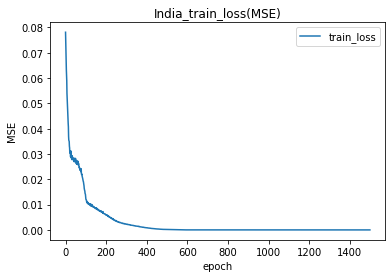

In [ ]:

plt.plot(train_mean_loss,label='train_loss')
plt.legend(loc='best')
plt.title('%s_train_loss(MSE)'%Country)
plt.xlabel('epoch')
plt.ylabel('MSE')

plt.show()

In [ ]:

LSTM_2_FC_3.eval()

prediction = []
test_loss = []
for seqs,labels in test_loader:
  seqs = Variable(seqs)
  outputs = LSTM_2_FC_3(seqs)
  prediction = prediction + list( (LSTM_2_FC_3(seqs).data.reshape(-1))*(Deaths_max-Deaths_min)+Deaths_min)
  loss = loss_fn(outputs,labels.float())
  test_loss.append(loss.data)

print('%s_test_loss: '%Country,np.array(test_loss).sum()/len(test_loss))


India_test_loss:  0.00037603664677590134


In [ ]:
prediction

[tensor(149502.7812),
 tensor(148913.4688),
 tensor(148509.4844),
 tensor(148726.7031),
 tensor(149341.4688),
 tensor(149597.3750),
 tensor(149812.4531),
 tensor(151197.6094),
 tensor(150474.4062),
 tensor(150295.0781),
 tensor(150228.6406),
 tensor(150870.3281),
 tensor(151062.8750),
 tensor(151249.5312),
 tensor(152629.3125),
 tensor(151835.0938),
 tensor(151594.7656),
 tensor(151705.3750),
 tensor(152092.2656),
 tensor(152296.5938),
 tensor(152442.5469),
 tensor(153832.3750),
 tensor(152949.8750),
 tensor(152669.6406),
 tensor(152757.8125),
 tensor(153123.2969),
 tensor(153316.0781),
 tensor(153442.9531),
 tensor(154850.2188),
 tensor(153904.9375),
 tensor(153613.6875),
 tensor(153685.2812),
 tensor(154027.7969),
 tensor(154210.3438),
 tensor(154315.0312),
 tensor(155732.4375),
 tensor(154741.1094),
 tensor(154395.3125),
 tensor(154428.7812),
 tensor(154727.1875),
 tensor(154879.0312),
 tensor(154968.0469),
 tensor(156396.1406),
 tensor(155383.6250),
 tensor(154994.5312),
 tensor(15

In [ ]:
len(prediction)

147

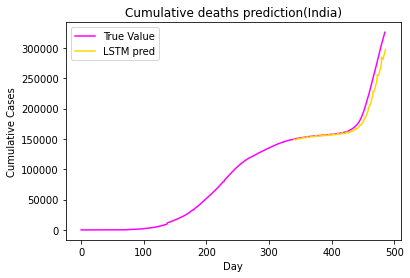

In [ ]:
from scipy.interpolate import make_interp_spline

plt.plot(np.array(us)[:,2]*(Deaths_max-Deaths_min)+Deaths_min, label='True Value',color = '#FF00FF')
#plt.plot(prediction[:], label='LSTM fit')
plt.plot(np.arange(test_data.shape[0]-len(prediction)+1, test_data.shape[0]+1, 1), prediction[:], label='LSTM pred',color='#FFD700')
#print(len(data[:,2]))
#print(len(prediction[90:]))
plt.legend(loc='best')
plt.title('Cumulative deaths prediction(%s)'%Country)
plt.xlabel('Day')
plt.ylabel('Cumulative Cases')

plt.show()

In [ ]:
mae = nn.L1Loss()

In [ ]:
prediction = []
test_mse_loss = []
for seqs,labels in test_loader:
  seqs = Variable(seqs)
  outputs = LSTM_2_FC_3(seqs)
  prediction = prediction + list( (LSTM_2_FC_3(seqs).data.reshape(-1))*(Deaths_max-Deaths_min)+Deaths_min)
  loss = loss_fn(outputs,labels.float())
  test_mse_loss.append(loss.data)

print('%s_test_mse_loss: '%Country,np.array(test_mse_loss).sum()/len(test_mse_loss))


India_test_mse_loss:  0.00037603664677590134


In [ ]:
prediction = []
test_mae_loss = []
for seqs,labels in test_loader:
  seqs = Variable(seqs)
  outputs = LSTM_2_FC_3(seqs)
  prediction = prediction + list( (LSTM_2_FC_3(seqs).data.reshape(-1))*(Deaths_max-Deaths_min)+Deaths_min)
  loss = mae(outputs,labels.float())
  test_mae_loss.append(loss.data)

print('%s_test_mae_loss: '%Country,np.array(test_mae_loss).sum()/len(test_mae_loss))
print('還原實際人數mae_loss: ',(np.array(test_mae_loss).sum()/len(test_mae_loss))*(Deaths_max-Deaths_min)+Deaths_min )

India_test_mae_loss:  0.011882785707712173
還原實際人數mae_loss:  3873.4554227143526
